Solar System Project
Computational Modeling
Author: Luka Burduli

$Gravitational Force
The gravitational force acting on a planet due to the Sun is given by:

$\vec{F} = -\frac{G M_{\odot} m}{r^3} \vec{r}$
where $G = 6.67 \times 10^{-11} \, \text{N m}^2 \text{kg}^{-2}$, $M_{\odot} = 2.0 \times 10^{30} \, \text{kg}$, $m$ is the mass of the planet, and $\vec{r}$ is the position vector of the planet relative to the Sun.

Initial Conditions

For Earth:

\begin{aligned}
    m_{\text{Earth}} &= 6.0 \times 10^{24} \, \text{kg}, \\
    a_{\text{Earth}} &= 1.0 \, \text{AU}, \\
    e_{\text{Earth}} &= 0.017, \\
    r_{\text{perihelion, Earth}} &= a_{\text{Earth}} (1 - e_{\text{Earth}}) \cdot \text{AU}.
\end{aligned}
For Venus:
\begin{aligned}
    m_{\text{Venus}} &= 4.9 \times 10^{24} \, \text{kg}, \\
    a_{\text{Venus}} &= 0.72 \, \text{AU}, \\
    e_{\text{Venus}} &= 0.007, \\
    r_{\text{perihelion,Venuss}} &= a_{\text{Venus}} (1 - e_{\text{venus}}) \cdot \text{AU}.
\end{aligned}

Euler Method

The Euler method updates the position and velocity as follows:

\begin{aligned}
    \vec{v}(t) &= \vec{v}(t-1) + \frac{\vec{F}(t)}{m} \Delta t, \\
    \vec{r}(t) &= \vec{r}(t-1) + \vec{v}(t) \Delta t.
\end{aligned}

The position, velocity, kinetic energy, potential energy and total energy  were recorded as functions of time. 
Using this data, the following plots were made:


dt=1000000.0(s)
Initial total energy for Earth: -2.675133689839573e+33
Final total energy for Earth: -2.640544305489017e+33
Initial total energy for Mars: -3.0342951574569226e+33
Final total energy for Mars: -2.774602895901761e+33
 
dt=500000.0(s)
Initial total energy for Earth: -2.675133689839573e+33
Final total energy for Earth: -2.6756214095161363e+33
Initial total energy for Mars: -3.0342951574569226e+33
Final total energy for Mars: -3.015574591629419e+33
 
dt=100000.0(s)
Initial total energy for Earth: -2.675133689839573e+33
Final total energy for Earth: -2.6750615054256713e+33
Initial total energy for Mars: -3.0342951574569226e+33
Final total energy for Mars: -3.030884743320914e+33
 


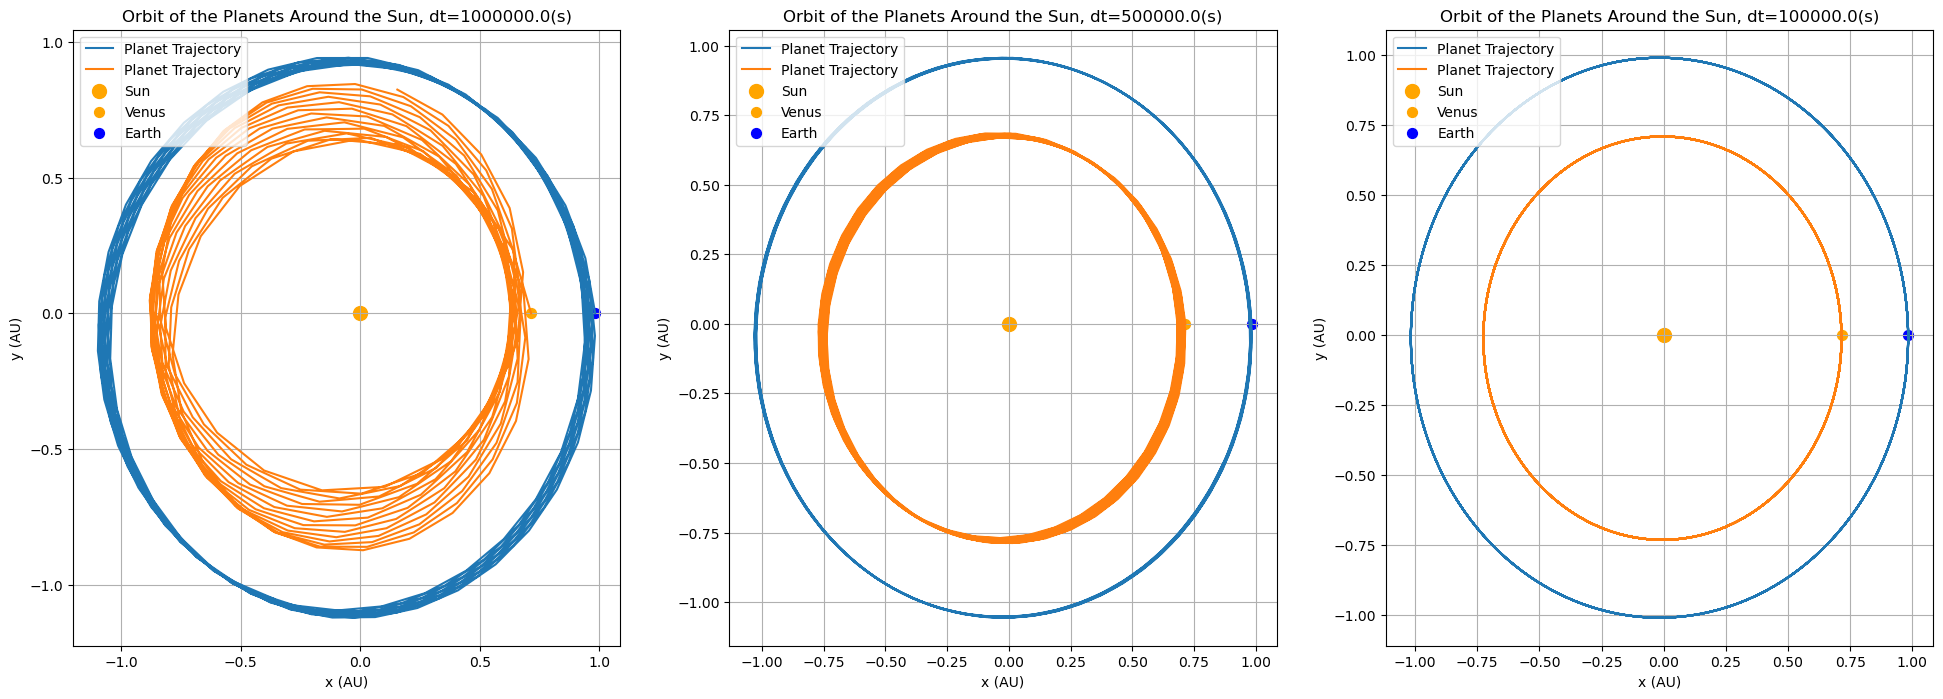

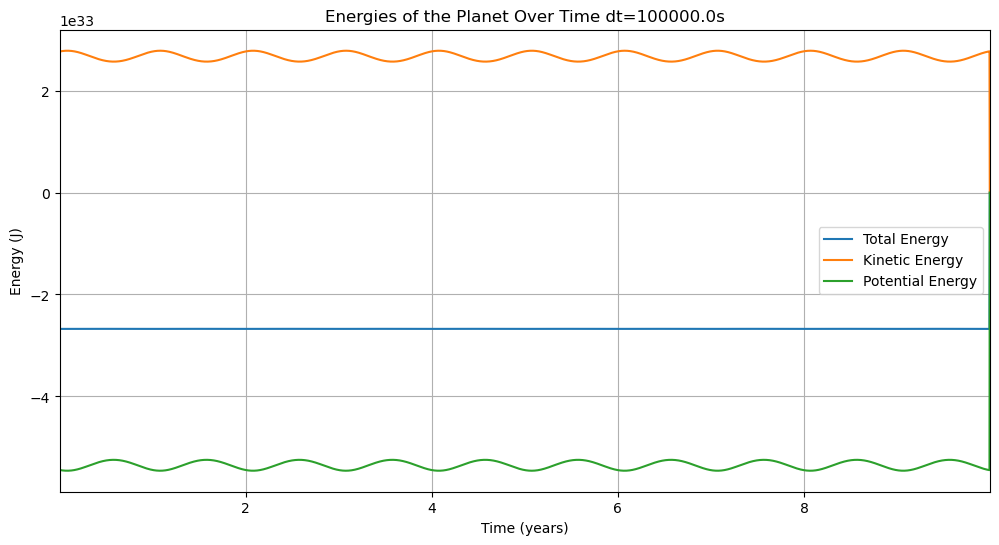

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G=6.67e-11  # gravitational constant, N m^2 kg^-2
M_sun=2.0e30  # mass of the Sun, kg


# Conversion factors
AU=1.496e11  # astronomical unit in meters
seconds_per_year=3.154e7  # number of seconds in one year

# Planetary data for Earth
mass=6.0e24  # kg
mass_venus=4.9e24 #mass of venus, kg
a=1.0  # semi-major axis in AU
a_venus=0.72
eccentricity_venus=0.007
eccentricity=0.017
r_perihelion=a*(1-eccentricity)*AU  # perihelion distance min distance
r_perihelion_venus=a_venus*(1-eccentricity_venus)*AU  

# Initial conditions for position and velocity at perihelion
x0=r_perihelion
y0=0
vx0=0
vy0=np.sqrt(G*M_sun*(2/r_perihelion-1/(a*AU)) )  # velocity at perihelion

x0_venus=r_perihelion_venus
y0_venus=0
vx0_venus=0
vy0_venus=np.sqrt(G*M_sun*(2/r_perihelion_venus-1/(a_venus*AU)))


# Time parameters
t_min=0
t_max=10*3.154e7  # 10 years in seconds
dt4=10000 # time step in seconds
dt_arr=[1e6, 0.5e6,1e5]
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
k=0
for dt in dt_arr:
# Initialize arrays to store position, velocity, and energies
    num_steps=int((t_max - t_min) / dt)
    time_years=np.arange(num_steps)*dt/seconds_per_year
    x=np.zeros(num_steps)
    y=np.zeros(num_steps)
    vx=np.zeros(num_steps)
    vy=np.zeros(num_steps)
    kinetic_energy=np.zeros(num_steps)
    potential_energy=np.zeros(num_steps)
    total_energy=np.zeros(num_steps)



    x_venus=np.zeros(num_steps)
    y_venus=np.zeros(num_steps)
    vx_venus=np.zeros(num_steps)
    vy_venus=np.zeros(num_steps)
    kinetic_energy_venus=np.zeros(num_steps)
    potential_energy_venus=np.zeros(num_steps)
    total_energy_venus=np.zeros(num_steps)



    # Set initial values
    x[0], y[0]=x0, y0
    vx[0], vy[0]=vx0, vy0

    x_venus[0], y_venus[0]=x0_venus, y0_venus
    vx_venus[0], vy_venus[0]=vx0_venus, vy0_venus

    # Function to calculate gravitational force
    def gravitational_force(x, y):
        r=np.sqrt(x**2 + y**2)
        F=-G*M_sun*mass/r**3
        return F*x, F*y
    def gravitational_force_venus(x_venus, y_venus):
        r_venus=np.sqrt(x_venus**2 + y_venus**2)
        F_venus=-G*M_sun*mass_venus/r_venus**3
        return F_venus*x_venus, F_venus*y_venus

    # Euler method integration
    for i in range(1, num_steps):
        Fx, Fy = gravitational_force(x[i-1], y[i-1])
        vx[i]=vx[i-1]+Fx/mass*dt
        vy[i]= vy[i-1]+Fy/mass*dt
        x[i]=x[i-1]+vx[i]*dt
        y[i]=y[i-1]+vy[i]*dt

        # Calculate energies
        r = np.sqrt(x[i-1]**2+y[i-1]**2)
        kinetic_energy[i-1]=0.5*mass *(vx[i-1]**2 + vy[i-1]**2)
        potential_energy[i-1]=-G*M_sun* mass/r
        total_energy[i-1]=kinetic_energy[i-1]+potential_energy[i-1]
        #venus
        
        Fx_venus, Fy_venus = gravitational_force_venus(x_venus[i-1], y_venus[i-1])
        vx_venus[i]=vx_venus[i-1]+Fx_venus/mass_venus*dt
        vy_venus[i]= vy_venus[i-1]+Fy_venus/mass_venus*dt
        x_venus[i]=x_venus[i-1]+vx_venus[i]*dt
        y_venus[i]=y_venus[i-1]+vy_venus[i]*dt

        # Calculate energies
        r_venus= np.sqrt(x_venus[i-1]**2+y_venus[i-1]**2)
        kinetic_energy_venus[i-1]=0.5*mass_venus *(vx_venus[i-1]**2 + vy_venus[i-1]**2)
        potential_energy_venus[i-1]=-G*M_sun* mass_venus/r_venus
        total_energy_venus[i-1]=kinetic_energy_venus[i-1]+potential_energy_venus[i-1]

    print(f"dt={dt}(s)")
    print(f"Initial total energy for Earth: {total_energy[0]}")
    print(f"Final total energy for Earth: {total_energy[-2]}")

    print(f"Initial total energy for Mars: {total_energy_venus[0]}")
    print(f"Final total energy for Mars: {total_energy_venus[-2]}")
    print(" ")
    ax = axes[k]


    # Plot the trajectory with the Sun
    ax.plot(x / AU, y / AU, label='Planet Trajectory')
    ax.plot(x_venus / AU, y_venus / AU, label='Planet Trajectory')
    ax.scatter(0, 0, color='orange', s=100, label='Sun')
    ax.scatter(x0_venus/AU, y0_venus/AU, color='orange', s=50, label='Venus')
    ax.scatter(x0/AU, y0/AU, color='blue', s=50, label='Earth')
    ax.set_xlabel('x (AU)')
    ax.set_ylabel('y (AU)')
    ax.set_title(f'Orbit of the Planets Around the Sun, dt={dt}(s)')
    ax.legend(loc='upper left')
    ax.grid()
    k+=1
    
plt.figure(figsize=(12, 6))
# Plot kinetic, potential, and total energieI am setting the axis to yearsl='Potential Energy')
plt.plot(time_years, total_energy, label='Total Energy')
plt.plot(time_years, kinetic_energy, label='Kinetic Energy')
plt.plot(time_years, potential_energy, label='Potential Energy')
plt.xlabel('Time (years)')
#plt.ylim(2.5e33,3e33)
plt.xlim(time_years[1], time_years[-1])
plt.ylabel('Energy (J)')
plt.title(f'Energies of the Planet Over Time dt={dt}s')
plt.legend()
plt.grid()
plt.show()
# Plot kinetic, potential, and total energies over time (in years)





Results

The simulated trajectories of Earth and Venus over a period of 10 years are shown in the first figure above. The initial conditions place both planets at perihelion. Different $\Delta t$ were tried to get stable results. It can be seen that for dt=0.5e6 erth orbit is stable and it it good timestep for euler method for earth. Same happend for venus when dt=1e5. From the figure it can be conculded that orbits of the planets are elipses. 

Figure 2 shows the kinetic, potential, and total energies of Earth over time for most stable time step dt=dt=1e5. Theoretically each type of energy should remain constant, and the plot validates theory. But because of the numerical error of the Euler method, we still have small differences between initial and final energies:
$$
dt=1000000.0(s)
$$
$$
Initial total energy for Earth: -2.675133689839573e+33\\
Final total energy for Earth: -2.640544305489017e+33\\
Initial total energy for Venus: -3.0342951574569226e+33\\
Final total energy for Venus: -2.774602895901761e+33\\
$$
$$ 
dt=500000.0(s)
$$
$$
Initial total energy for Earth: -2.675133689839573e+33\\
Final total energy for Earth: -2.6756214095161363e+33\\
Initial total energy for Venus: -3.0342951574569226e+33\\
Final total energy for Venus: -3.015574591629419e+33\\
$$
$$
dt=100000.0(s)
$$
$$
Initial total energy for Earth: -2.675133689839573e+33\\
Final total energy for Earth: -2.6750615054256713e+33\\
Initial total energy for Venus: -3.0342951574569226e+33\\
Final total energy for Venus: -3.030884743320914e+33\\
$$

To investiage this phenomena deeper, and determine the reasonable value for $\Delta t$, the energy change over one orbit as a function of  $\Delta t$ was plotted. Again theoretical expectance for $\Delta E$ is 0.


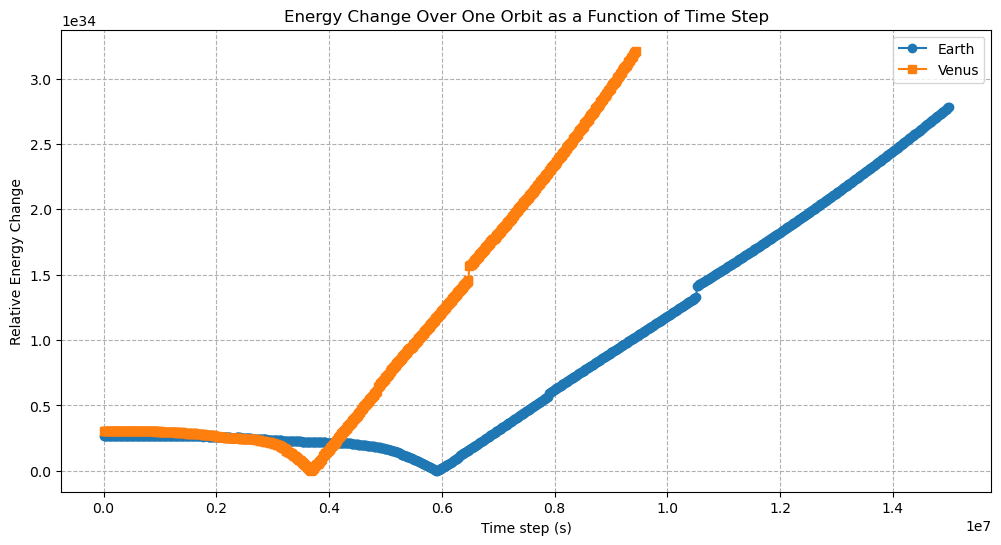

In [26]:

# Time parameters
t_min=0
t_max=3.154e7  # 1 year in seconds
t_max_venus=224.7* t_max/365
# Range of time steps to test
#dt_arr = [1e5, 2.5e5, 3e5, 4e5, 4.5e5, 5e5,5.5e5, 6e5, 7e5, 8e5, 1e6, 2.5e6, 4e6, 5e6, 6e6,7e6,8e6,8.5e6, 1e7]
dt_arr=np.linspace(1000,1.5e7, 1000)

energy_changes_earth=[]
energy_changes_venus=[]

# Function to calculate gravitational force
def gravitational_force(x, y, mass):
    r=np.sqrt(x**2 + y**2)
    F=-G*M_sun *mass/r**3
    return F*x, F*y

# Run simulation for different time steps
for dt in dt_arr:
    num_steps=int((t_max-t_min)/dt)
    num_steps_venus=int((t_max_venus-t_min)/dt)
    x= np.zeros(num_steps)
    y= np.zeros(num_steps)
    vx= np.zeros(num_steps)
    vy= np.zeros(num_steps)
    total_energy=np.zeros(num_steps)

    x_venus=np.zeros(num_steps_venus)
    y_venus=np.zeros(num_steps_venus)
    vx_venus=np.zeros(num_steps_venus)
    vy_venus=np.zeros(num_steps_venus)
    total_energy_venus = np.zeros(num_steps_venus)

    # Set initial values for Earth
    x[0], y[0]=x0,y0
    vx[0], vy[0]=vx0,vy0

    # Set initial values for Venus
    x_venus[0], y_venus[0] = x0_venus, y0_venus
    vx_venus[0], vy_venus[0] = vx0_venus, vy0_venus

    # Euler method integration
    for i in range(1, num_steps):
        # Earth
        Fx, Fy =gravitational_force(x[i-1], y[i-1], mass)
        vx[i]=vx[i-1]+Fx/mass*dt
        vy[i]=vy[i-1]+Fy/mass*dt
        x[i]=x[i-1]+vx[i]*dt
        y[i]=y[i-1]+vy[i]*dt

        r = np.sqrt(x[i]**2 + y[i]**2)
        kinetic_energy = 0.5 * mass * (vx[i]**2 + vy[i]**2)
        potential_energy = -G* M_sun * mass / r
        total_energy[i] = kinetic_energy + potential_energy
        
    for i in range(1, num_steps_venus):
        Fx_venus, Fy_venus = gravitational_force(x_venus[i - 1], y_venus[i - 1], mass_venus)
        vx_venus[i]=vx_venus[i -1] + Fx_venus/mass_venus * dt
        vy_venus[i]=vy_venus[i-1] + Fy_venus/mass_venus*dt
        x_venus[i]=x_venus[i-1] + vx_venus[i]*dt
        y_venus[i]=y_venus[i -1] + vy_venus[i] *dt

        r_venus = np.sqrt(x_venus[i]**2 + y_venus[i]**2)
        kinetic_energy_venus = 0.5 * mass_venus * (vx_venus[i]**2 + vy_venus[i]**2)
        potential_energy_venus = -G * M_sun * mass_venus / r_venus
        total_energy_venus[i] = kinetic_energy_venus + potential_energy_venus

    
    # Calculate the energy change over one orbit for Earth and Venus
    energy_change_earth=np.abs(total_energy[0] -total_energy[-1]) 
    energy_change_venus= np.abs(total_energy_venus[0]-total_energy_venus[-1])

    energy_changes_earth.append(energy_change_earth)
    energy_changes_venus.append(energy_change_venus)

# Plot the energy change as a function of time step
plt.figure(figsize=(12, 6))
plt.plot(dt_arr, energy_changes_earth, marker='o', label='Earth')
plt.plot(dt_arr[:-370], energy_changes_venus[:-370], marker='s', label='Venus')
plt.xlabel('Time step (s)')
plt.ylabel('Relative Energy Change')
#plt.xscale('log')
#plt.yscale('log')
plt.title('Energy Change Over One Orbit as a Function of Time Step')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


The provided graph shows the relative energy change over one orbit period for Earth and Venus using the Euler method for numerical integration. The simulation period was chosen to cover one complete orbit for each planet. From the graph, it is evident that the relative energy change is not constant over time, which is caused because small errors of the Euler method. As the time step increases, the error in the Euler method also increases, causing a significant difference between the initial and final values of the total energy. This trend suggests that integration errors accumulate over time.
The graph shows that Venus exhibits a more pronounced relative energy change compared to Earth, especially with larger time steps. This suggests that Venus, with its shorter orbital period and closer proximity to the Sun, is more sensitive to numerical errors. For Venus, an optimal Euler step size should be smaller compared to Earth to achieve accurate simulation of its energy dynamics. The higher sensitivity is evident from the steeper increase in relative energy change for Venus as the time step increases. Optimal timestep for the venus is 0.3e7 and for the earth it is 0.5e7.